<a href="https://colab.research.google.com/github/Jason-Gitau/freecodecamp-LangGraph-for-beginners/blob/main/LangGraph_lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# we are going to be building a sequencial graph(an agent with multiple nodes)

In [ ]:
from typing import  TypedDict

!pip install langgraph

from langgraph.graph import StateGraph

In [ ]:
class AgentState(TypedDict):
    name: str
    age: str
    final:str




In [ ]:
def first_node(state: AgentState)->AgentState:
    """ this is the first node """
    state['final'] = f"Hi  {state['name']}"
    return state


def second_node(state: AgentState)->AgentState:
    """ this is the second node """
    state['final'] =state['final'] + f" you are {state['age']} years old"
    return state

In [ ]:
graph = StateGraph(AgentState)

graph.add_node('first node',first_node)
graph.add_node('Second node',second_node)

graph.set_entry_point('first node')
graph.add_edge('first node','Second node')
graph.set_finish_point('Second node')

app=graph.compile()

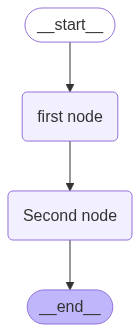

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result=app.invoke({'name':'John','age':'30'})
print(result)

{'name': 'John', 'age': '30', 'final': 'Hi  John you are 30 years old'}
